Exercise 1

0.5909340566793458
0.5909339935414785


Text(0, 0.5, 'D')

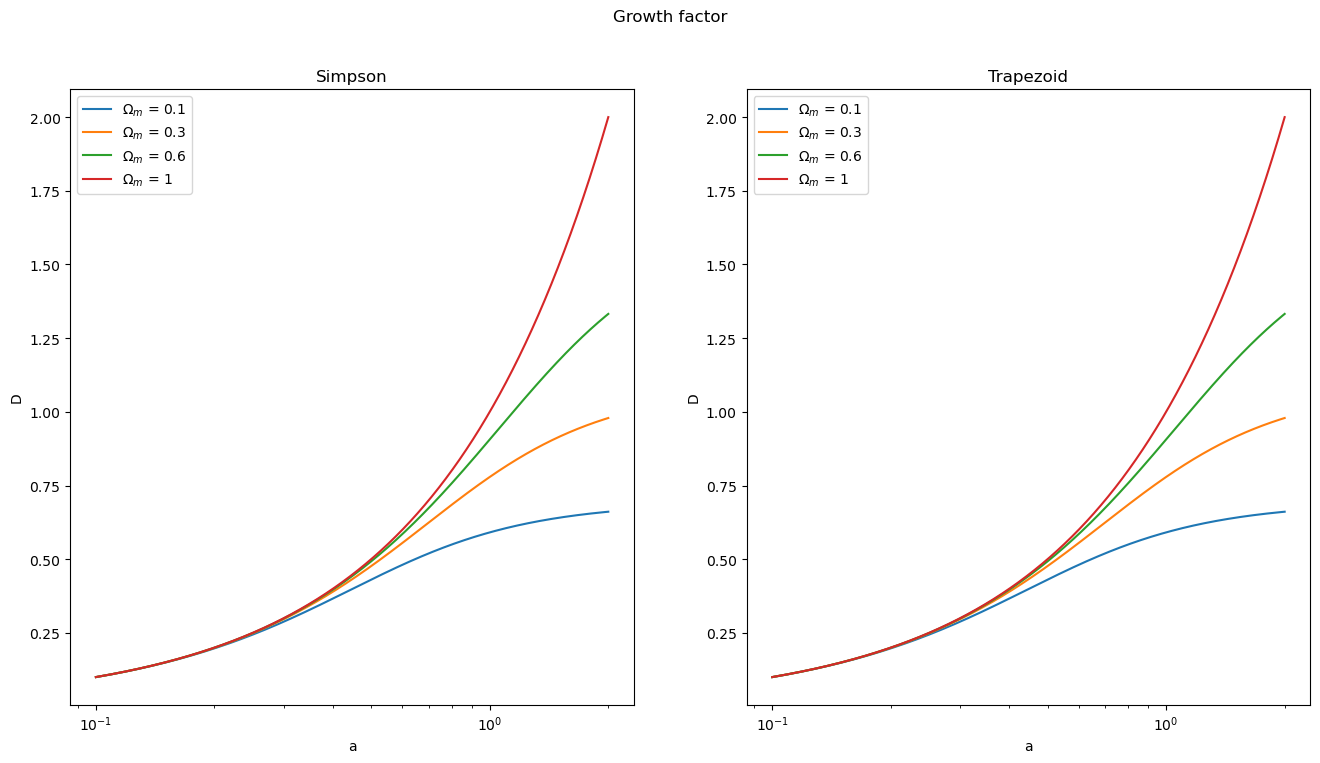

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simpson(f,a,b,n):
    h = (b-a)/(n)
    x = np.linspace(a,b,n+1)
    fx = f(x)
    suma = 0
    i = 0
    while i <= n-2:
        suma += fx[i]+4*fx[i+1]+fx[i+2]
        i += 2

    return h*suma/3

def trapezoid(f,a,b,n):
    h = (b-a)/(n-1)
    x = np.linspace(a,b,n)
    fx = f(x)
    return h/2.*(fx[0] + 2*sum(fx[1:n-1]) + fx[n-1])

def growth_factor_simpson(a,Om,H0, n = 1000):
    H = H0 * np.sqrt(Om*a**(-3) + 1 - Om)
    integral = simpson(lambda x: 1/(x*np.sqrt(Om*x**(-3) + 1 - Om))**3,1e-8, a, n)
    D = 2.5*Om*(H/H0)*integral
    return D

def growth_factor_trapezoid(a,Om,H0, n = 1000):
    H = H0 * np.sqrt(Om*a**(-3) + 1 - Om)
    integral = trapezoid(lambda x: 1/(x*np.sqrt(Om*x**(-3) + 1 - Om))**3,1e-8, a, n)
    D = 2.5*Om*(H/H0)*integral
    return D

print(growth_factor_simpson(1,0.1,1))
print(growth_factor_trapezoid(1,0.1,1))

values_Om = [0.1,0.3,0.6,1]
D_simpson, D_trapezoid = [], []
a = np.linspace(0.1,2,1000)
H0 = 67.4

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

for Om in values_Om:
    D_simpson_Om, D_trapezoid_Om = [],[]
    for a_i in a:
        D_simpson_Om.append(growth_factor_simpson(a_i,Om,H0))
        D_trapezoid_Om.append(growth_factor_trapezoid(a_i,Om,H0))

    D_simpson.append(D_simpson_Om)
    D_trapezoid.append(D_trapezoid_Om)

    ax1.semilogx(a,D_simpson_Om,label="$\Omega_m$ = " + str(Om))
    ax2.semilogx(a,D_trapezoid_Om,label="$\Omega_m$ = " + str(Om))

fig.suptitle("Growth factor")
ax1.legend(loc="best")
ax2.legend(loc="best")
ax1.set_title("Simpson")
ax2.set_title("Trapezoid")
ax1.set_xlabel("a")
ax1.set_ylabel("D")
ax2.set_xlabel("a")
ax2.set_ylabel("D")

# As we can see in the plots, in a matter-dominated universe, cosmic structures would grow faster

In [67]:
def newton_raphson(f,f_prime,x0 = 1, n=100):
    x = x0
    for i in range(n):
        x = x0 - f(x0)/f_prime(x0)
        x0 = x
    return x

def bisection(f,a,b,n=100):

    for i in range(n):
        c = 0.5*(a+b)
        if f(a)*f(c) < 0:
            b = c
        elif f(a)*f(c) > 0:
            a = c
        else:
            return c
            break

    return c

ecc_values = [0.1,0.7,0.9]
F_values = [np.pi,np.pi/3]

for ecc in ecc_values:
    for F in F_values:
        root_new = newton_raphson(lambda x: x-ecc*np.sin(x)-F, lambda x: 1-ecc*np.cos(x))
        root_bis = bisection(lambda x: x-ecc*np.sin(x)-F, -30,30)
        print("ecc = %.1f and F = %.4f" %(ecc,F))
        print("Newton-Raphson: %.6f"%root_new)
        print("Bisection: %.6f"%root_bis)
        print()

ecc = 0.1 and F = 3.1416
Newton-Raphson: 3.141593
Bisection: 3.141593

ecc = 0.1 and F = 1.0472
Newton-Raphson: 1.137976
Bisection: 1.137976

ecc = 0.7 and F = 3.1416
Newton-Raphson: 3.141593
Bisection: 3.141593

ecc = 0.7 and F = 1.0472
Newton-Raphson: 1.737494
Bisection: 1.737494

ecc = 0.9 and F = 3.1416
Newton-Raphson: 3.141593
Bisection: 3.141593

ecc = 0.9 and F = 1.0472
Newton-Raphson: 1.899123
Bisection: 1.899123



In [56]:
def new_newton_raphson(f,x0=0,n=100):

    def fprime(f,x,h=1e-6):
        return (f(x+h)-f(x-h))/(2*h)
    x = x0
    for i in range(n):
        x = x0 - f(x0)/fprime(f,x0)
        x0 = x
    return x

In [55]:
def pivot(C):
    D = C.copy()
    D[0],D[1],D[2],D[3],D[4] = C[2],C[3],C[0],C[4],C[1]
    for i in range(len(C)):
        while D[i][i] == 0:
            a = 1
            if D[i+a][i] != 0:
                D[[i, i+a]] = D[[i+a, i]]
            elif D[i+a][i] == 0 and i+a<len(D):
                a += 1
    return D

def gauss(C):
    D = C.copy()
    n = len(D)
    for i in range(n):
        for j in range(i+1,n):
            if D[j][i] != 0:
                D[j] -= D[j][i]/D[i][i] * D[i]

    solutions = []
    
    for i in range(n-1,-1,-1):
        suma = D[i][n]
        for z in range(len(solutions)):
            suma -=  solutions[z]*D[i][n-z-1]
        solutions.append(suma/D[i][i])
    return np.array(solutions[::-1])

A = np.array([[0.,5.,15.,0.,1.],
             [1.,0.,2.,13.,9.],
             [17.,5.,17.,2.,1.],
             [1.,12.,4.,13.,9.],
             [1.,2.,4.,13.,0.]])
B = np.array([[17.],
             [27.],
             [17.],
             [-1.],
             [12.]])
C = np.hstack((A,B))

# A)
solution = np.linalg.solve(A,B)
print(solution)
# B)
gauss(pivot(C))

[[-0.31564001]
 [-2.65290323]
 [ 1.91741935]
 [ 0.7655207 ]
 [ 1.50322581]]


array([-0.31564001, -2.65290323,  1.91741935,  0.7655207 ,  1.50322581])